# 'regional_price_analysis.ipynb'



### 📋 분석 목표
- **User_Goal_1**: 서울, 경기, 인천 광역시의 부동산 가격 변동 패턴을 비교 분석하고, 지역별 시장 특성과 투자 매력도를 평가
- **User_Goal_2**: 전용면적별(소형, 중형, 대형) 아파트의 가격 변동 추이를 분석하고, 생애주기에 따른 최적 투자 전략과 거주 전략을 데이터 기반으로 제시
- **User_Goal_3**: 부동산 거래량 변화가 가격 변동에 미치는 영향을 시차 분석을 통해 파악하고, 시장 전환점을 예측할 수 있는 지표를 개발

### 📁 데이터
- **파일명**: 220820-250819combined_capital_area_apt_normal_sales_clean.csv
- **기간**: 2022년 8월 20일 ~ 2025년 8월 19일
- **대상**: 수도권 아파트 정상 거래 (450,609건)


# 1. 라이브러리 import
# 2. 한글 폰트 설정
# 3. CSV 파일 읽기
# 4. 데이터 확인


In [7]:
# 1. 환경 설정 및 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Gemini가 순서를 바꿔보래
## 시각화 스타일 설정 
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 한글 폰트 설정
import sys
import os
sys.path.append('/Users/jaehyuntak/Desktop/pjt-data-analysis')
from da_utils.font import setup_korean_font
setup_korean_font()



# 데이터 로드
file_path = '/Users/jaehyuntak/Desktop/pjt-data-analysis/processed_data/220820-250819combined_capital_area_apt_normal_sales_clean.csv'
df_normal_sales = pd.read_csv(file_path, encoding='utf-8')

# 날짜 컬럼 datetime 변환
df_normal_sales['계약날짜'] = pd.to_datetime(df_normal_sales['계약날짜'])
df_normal_sales['등기일자'] = pd.to_datetime(df_normal_sales['등기일자'])

print("=== 데이터 로드 완료 ===")
print(f"데이터 크기: {df_normal_sales.shape[0]:,}행 × {df_normal_sales.shape[1]}열")
print(f"분석 기간: {df_normal_sales['계약날짜'].min().strftime('%Y-%m-%d')} ~ {df_normal_sales['계약날짜'].max().strftime('%Y-%m-%d')}")
print(f"\n지역별 데이터:")
for region in df_normal_sales['지역'].unique():
    count = len(df_normal_sales[df_normal_sales['지역'] == region])
    print(f"  {region}: {count:,}건 ({count/len(df_normal_sales)*100:.1f}%)")

✅ 성공: 'AppleGothic' 폰트를 설정했습니다.
=== 데이터 로드 완료 ===
데이터 크기: 450,609행 × 23열
분석 기간: 2023-01-01 ~ 2025-08-13

지역별 데이터:
  경기: 269,588건 (59.8%)
  인천: 64,140건 (14.2%)
  서울: 116,881건 (25.9%)


In [8]:
# font.py 갱신함
# 성공
# 3. 한글 폰트 설정 (간단한 방법)
# import matplotlib.pyplot as plt

# # Mac에서 한글 폰트 설정
# plt.rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# # 테스트
# fig, ax = plt.subplots(figsize=(6, 4))
# ax.text(0.5, 0.5, '한글 테스트: 서울, 경기, 인천', 
#         ha='center', va='center', fontsize=20)
# ax.set_title('한글 폰트 테스트')
# plt.show()

### Darwin (macOS)

**Darwin**은 Apple이 개발한 **macOS (Mac OS X)**의 핵심 시스템입니다. 이는 **BSD(Berkeley Software Distribution)**를 기반으로 한 오픈소스 운영체제 커널로, macOS의 토대 역할을 합니다.

---

### Windows

**Windows**는 Microsoft가 개발하고 판매하는 상용 운영체제입니다. 이는 Windows NT 커널을 기반으로 하며, 데스크톱, 노트북, 서버 등 다양한 장치에서 널리 사용됩니다.

---

### Linux

**Linux**는 리누스 토르발스가 개발한 **Linux 커널**을 기반으로 한 오픈소스 운영체제입니다. 다양한 개발 공동체와 기업들이 이 커널을 활용하여 **Linux 배포판(Distribution)**을 만듭니다. 데비안(Debian), 우분투(Ubuntu), 페도라(Fedora) 등이 대표적인 예입니다.

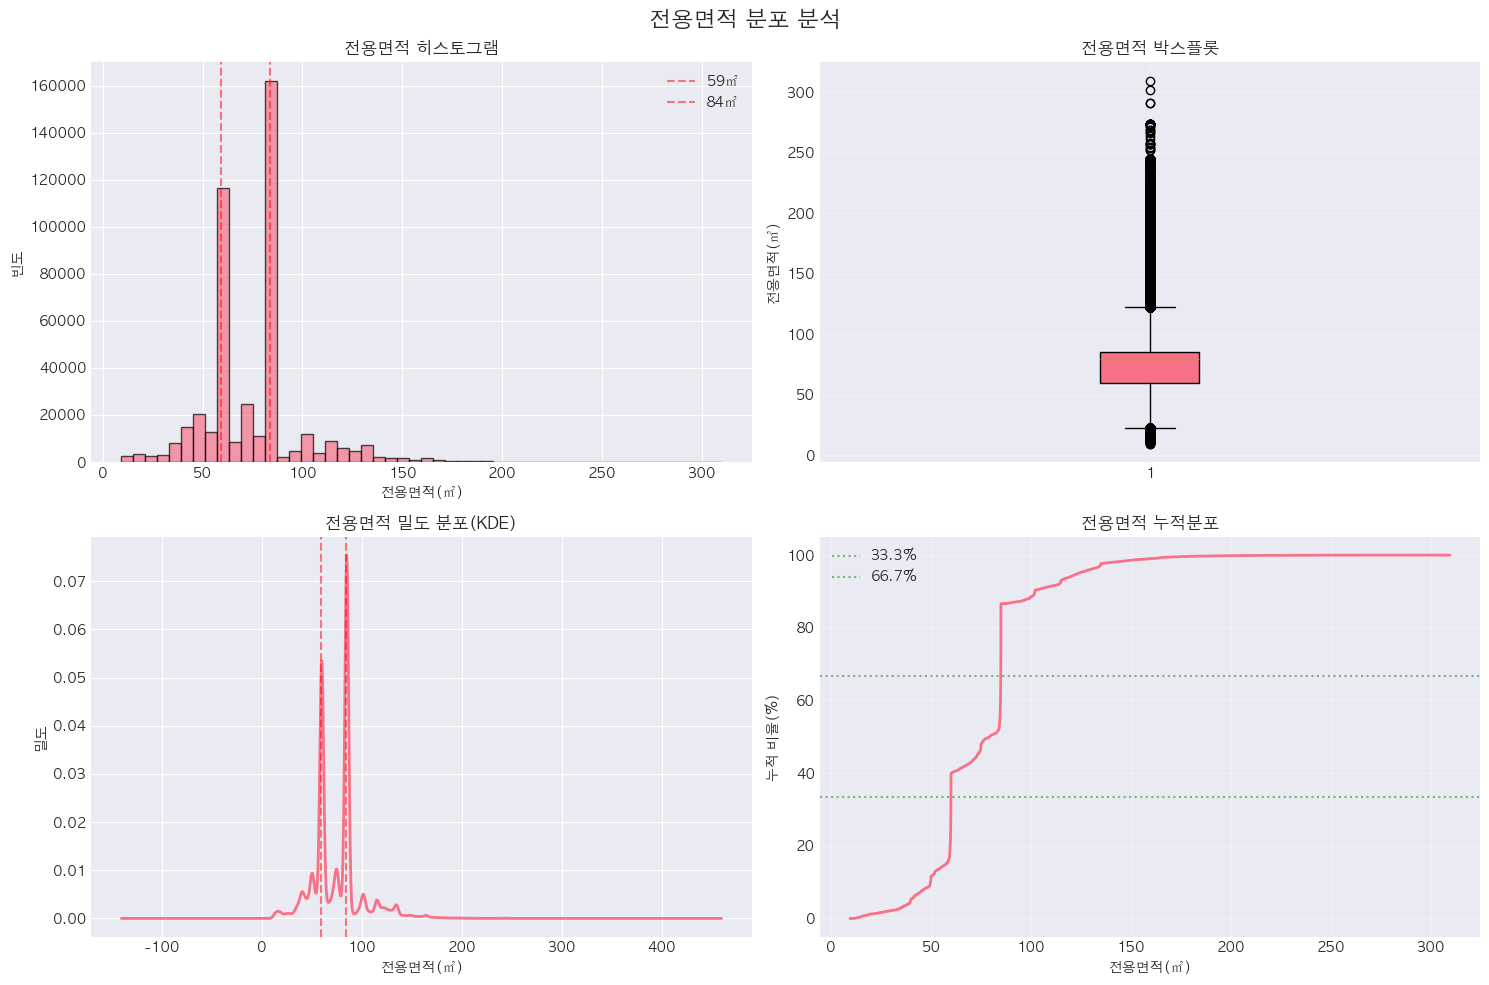


=== 전용면적 기초 통계 ===
count    450609.000000
mean         75.688495
std          25.193296
min           9.410000
25%          59.840000
50%          79.240000
75%          84.960000
max         309.700000
Name: 전용면적(㎡), dtype: float64

평형 환산 기준:
- 최소: 2.8평
- 평균: 22.9평
- 최대: 93.7평


In [9]:
# 2. 전용면적 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('전용면적 분포 분석', fontsize=16, y=0.98)

# 평형 환산 추가
df_normal_sales['평형'] = df_normal_sales['전용면적(㎡)'] / 3.3058  # 정확한 평형 환산

# 1. 히스토그램
ax1 = axes[0, 0]
ax1.hist(df_normal_sales['전용면적(㎡)'], bins=50, edgecolor='black', alpha=0.7)
ax1.set_xlabel('전용면적(㎡)')
ax1.set_ylabel('빈도')
ax1.set_title('전용면적 히스토그램')
ax1.axvline(59, color='red', linestyle='--', alpha=0.5, label='59㎡')
ax1.axvline(84, color='red', linestyle='--', alpha=0.5, label='84㎡')
ax1.legend()

# 2. 박스플롯
ax2 = axes[0, 1]
box_data = ax2.boxplot(df_normal_sales['전용면적(㎡)'], vert=True, patch_artist=True)
ax2.set_ylabel('전용면적(㎡)')
ax2.set_title('전용면적 박스플롯')
ax2.grid(True, alpha=0.3)

# 3. KDE 플롯 (밀도 분포)
ax3 = axes[1, 0]
df_normal_sales['전용면적(㎡)'].plot.density(ax=ax3, linewidth=2)
ax3.set_xlabel('전용면적(㎡)')
ax3.set_ylabel('밀도')
ax3.set_title('전용면적 밀도 분포(KDE)')
ax3.axvline(59, color='red', linestyle='--', alpha=0.5)
ax3.axvline(84, color='red', linestyle='--', alpha=0.5)

# 4. 누적분포
ax4 = axes[1, 1]
sorted_area = np.sort(df_normal_sales['전용면적(㎡)'])
cumulative = np.arange(1, len(sorted_area) + 1) / len(sorted_area) * 100
ax4.plot(sorted_area, cumulative, linewidth=2)
ax4.set_xlabel('전용면적(㎡)')
ax4.set_ylabel('누적 비율(%)')
ax4.set_title('전용면적 누적분포')
ax4.grid(True, alpha=0.3)
ax4.axhline(33.3, color='green', linestyle=':', alpha=0.5, label='33.3%')
ax4.axhline(66.7, color='green', linestyle=':', alpha=0.5, label='66.7%')
ax4.legend()

plt.tight_layout()
plt.show()

# 기초 통계량
print("\n=== 전용면적 기초 통계 ===")
print(df_normal_sales['전용면적(㎡)'].describe())
print(f"\n평형 환산 기준:")
print(f"- 최소: {df_normal_sales['평형'].min():.1f}평")
print(f"- 평균: {df_normal_sales['평형'].mean():.1f}평")  
print(f"- 최대: {df_normal_sales['평형'].max():.1f}평")

=== 평형대 구분 결과 ===
          min       max        mean
평형대                                
대형   108.6002  309.7000  132.660744
소형     9.4100   69.2500   53.970168
중형    69.2572  108.5918   84.542178


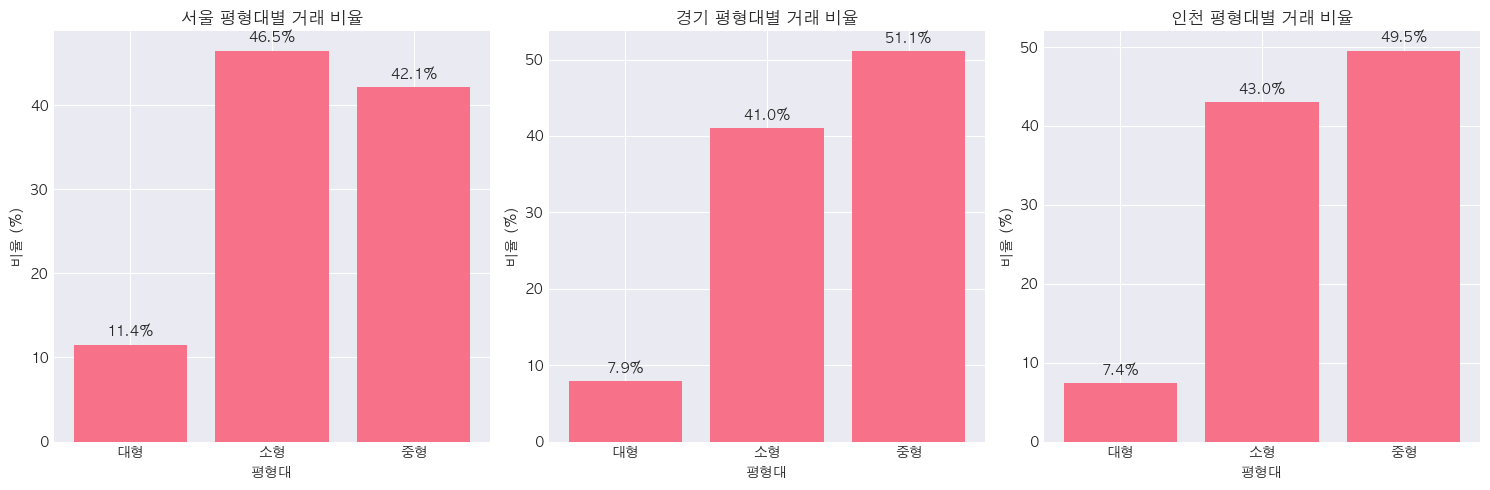


=== 지역별 평형대 선호도 (%) ===
평형대    대형    소형    중형
지역                   
경기    7.9  41.0  51.1
서울   11.4  46.5  42.1
인천    7.4  43.0  49.5


In [11]:
# 3. 지역별 평형대 분석
# 먼저 K-means로 평형대 구분
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# K-means 클러스터링
scaler = StandardScaler()
area_scaled = scaler.fit_transform(df_normal_sales[['전용면적(㎡)']].values)

# Elbow method로 최적 k 확인
inertias = []
K_range = range(2, 6)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(area_scaled)
    inertias.append(kmeans.inertia_)

# 3개 클러스터로 분류
kmeans = KMeans(n_clusters=3, random_state=42)
df_normal_sales['평형대_클러스터'] = kmeans.fit_predict(area_scaled)

# 클러스터별 평균 면적 확인으로 라벨 재할당
cluster_means = df_normal_sales.groupby('평형대_클러스터')['전용면적(㎡)'].mean().sort_values()
size_mapping = {cluster_means.index[0]: '소형', 
                cluster_means.index[1]: '중형', 
                cluster_means.index[2]: '대형'}
df_normal_sales['평형대'] = df_normal_sales['평형대_클러스터'].map(size_mapping)

# 평형대별 경계값 저장
size_boundaries = df_normal_sales.groupby('평형대')['전용면적(㎡)'].agg(['min', 'max', 'mean'])
print("=== 평형대 구분 결과 ===")
print(size_boundaries)

# 지역별 평형대 분포
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
regions = ['서울', '경기', '인천']

for idx, region in enumerate(regions):
    region_data = df_normal_sales[df_normal_sales['지역'] == region]
    
    # 평형대별 비율
    size_dist = region_data['평형대'].value_counts(normalize=True).sort_index()
    
    axes[idx].bar(size_dist.index, size_dist.values * 100)
    axes[idx].set_title(f'{region} 평형대별 거래 비율')
    axes[idx].set_ylabel('비율 (%)')
    axes[idx].set_xlabel('평형대')
    
    # 비율 텍스트 추가
    for i, (k, v) in enumerate(size_dist.items()):
        axes[idx].text(i, v*100 + 1, f'{v*100:.1f}%', ha='center')

plt.tight_layout()
plt.show()

# 특이점 변수 저장
regional_size_preference = df_normal_sales.groupby(['지역', '평형대']).size().unstack(fill_value=0)
regional_size_preference_pct = regional_size_preference.div(regional_size_preference.sum(axis=1), axis=0) * 100

print("\n=== 지역별 평형대 선호도 (%) ===")
print(regional_size_preference_pct.round(1))

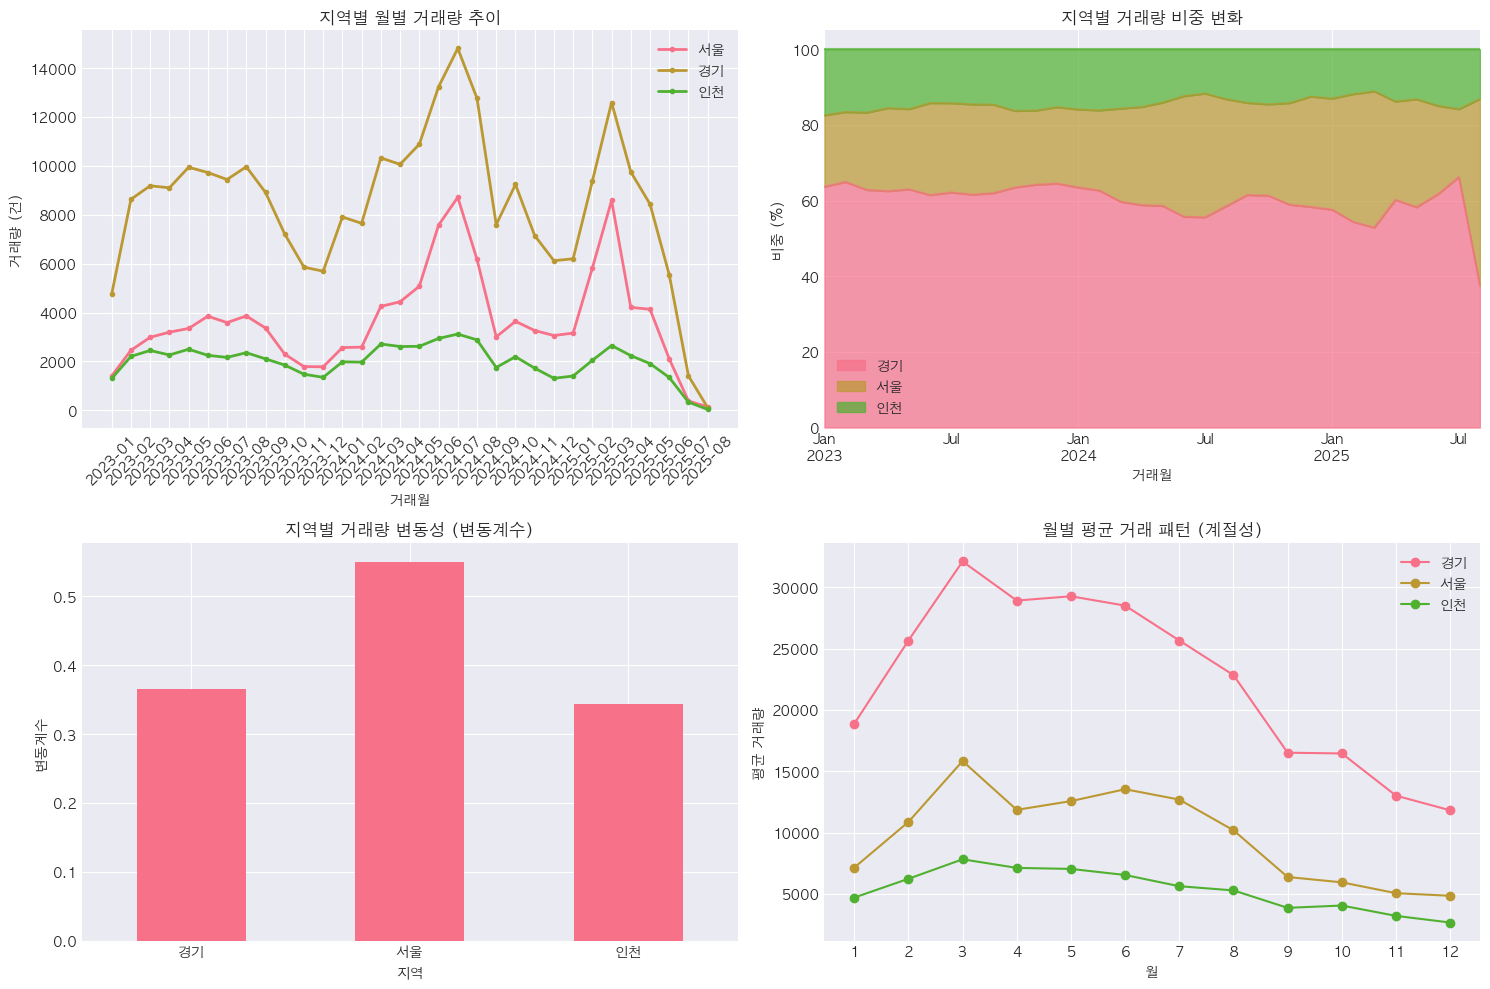


=== 지역별 거래량 통계 ===
     전체거래량     월평균    표준편차   변동계수
지역                               
경기  269588  8425.0  3076.0  0.365
서울  116881  3653.0  2007.0  0.550
인천   64140  2004.0   689.0  0.344

거래량 변동성이 가장 높은 지역: 서울 (CV=0.550)


In [12]:
# 4. 지역별 거래량 분석
# 월별 거래량 집계
df_normal_sales['거래월'] = df_normal_sales['계약날짜'].dt.to_period('M')

# 지역별 월별 거래량
monthly_volume = df_normal_sales.groupby(['거래월', '지역']).size().unstack(fill_value=0)

# 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 지역별 월별 거래량 추이
ax1 = axes[0, 0]
for region in regions:
    ax1.plot(monthly_volume.index.astype(str), monthly_volume[region], 
             marker='o', markersize=3, label=region, linewidth=2)
ax1.set_title('지역별 월별 거래량 추이')
ax1.set_xlabel('거래월')
ax1.set_ylabel('거래량 (건)')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

# 2. 지역별 거래량 비중 변화
ax2 = axes[0, 1]
volume_pct = monthly_volume.div(monthly_volume.sum(axis=1), axis=0) * 100
volume_pct.plot(kind='area', ax=ax2, alpha=0.7)
ax2.set_title('지역별 거래량 비중 변화')
ax2.set_ylabel('비중 (%)')
ax2.legend()

# 3. 거래량 변동성 (변동계수)
ax3 = axes[1, 0]
volume_cv = monthly_volume.std() / monthly_volume.mean()
volume_cv.plot(kind='bar', ax=ax3)
ax3.set_title('지역별 거래량 변동성 (변동계수)')
ax3.set_ylabel('변동계수')
ax3.tick_params(axis='x', rotation=0)

# 4. 계절성 분석 (월별 평균)
ax4 = axes[1, 1]
df_normal_sales['거래월_숫자'] = df_normal_sales['계약날짜'].dt.month
seasonal_pattern = df_normal_sales.groupby(['거래월_숫자', '지역']).size().unstack()
seasonal_pattern.plot(ax=ax4, marker='o')
ax4.set_title('월별 평균 거래 패턴 (계절성)')
ax4.set_xlabel('월')
ax4.set_ylabel('평균 거래량')
ax4.set_xticks(range(1, 13))
ax4.legend()

plt.tight_layout()
plt.show()

# 분석 결과 저장
volume_stats = {
    '전체_거래량': monthly_volume.sum(),
    '월평균_거래량': monthly_volume.mean(),
    '거래량_표준편차': monthly_volume.std(),
    '변동계수': volume_cv,
    '최대_거래월': monthly_volume.idxmax(),
    '최소_거래월': monthly_volume.idxmin()
}

print("\n=== 지역별 거래량 통계 ===")
summary_df = pd.DataFrame({
    '전체거래량': volume_stats['전체_거래량'],
    '월평균': volume_stats['월평균_거래량'].round(0),
    '표준편차': volume_stats['거래량_표준편차'].round(0),
    '변동계수': volume_stats['변동계수'].round(3)
})
print(summary_df)

# 특이점 저장
high_volatility_region = volume_cv.idxmax()
print(f"\n거래량 변동성이 가장 높은 지역: {high_volatility_region} (CV={volume_cv[high_volatility_region]:.3f})")

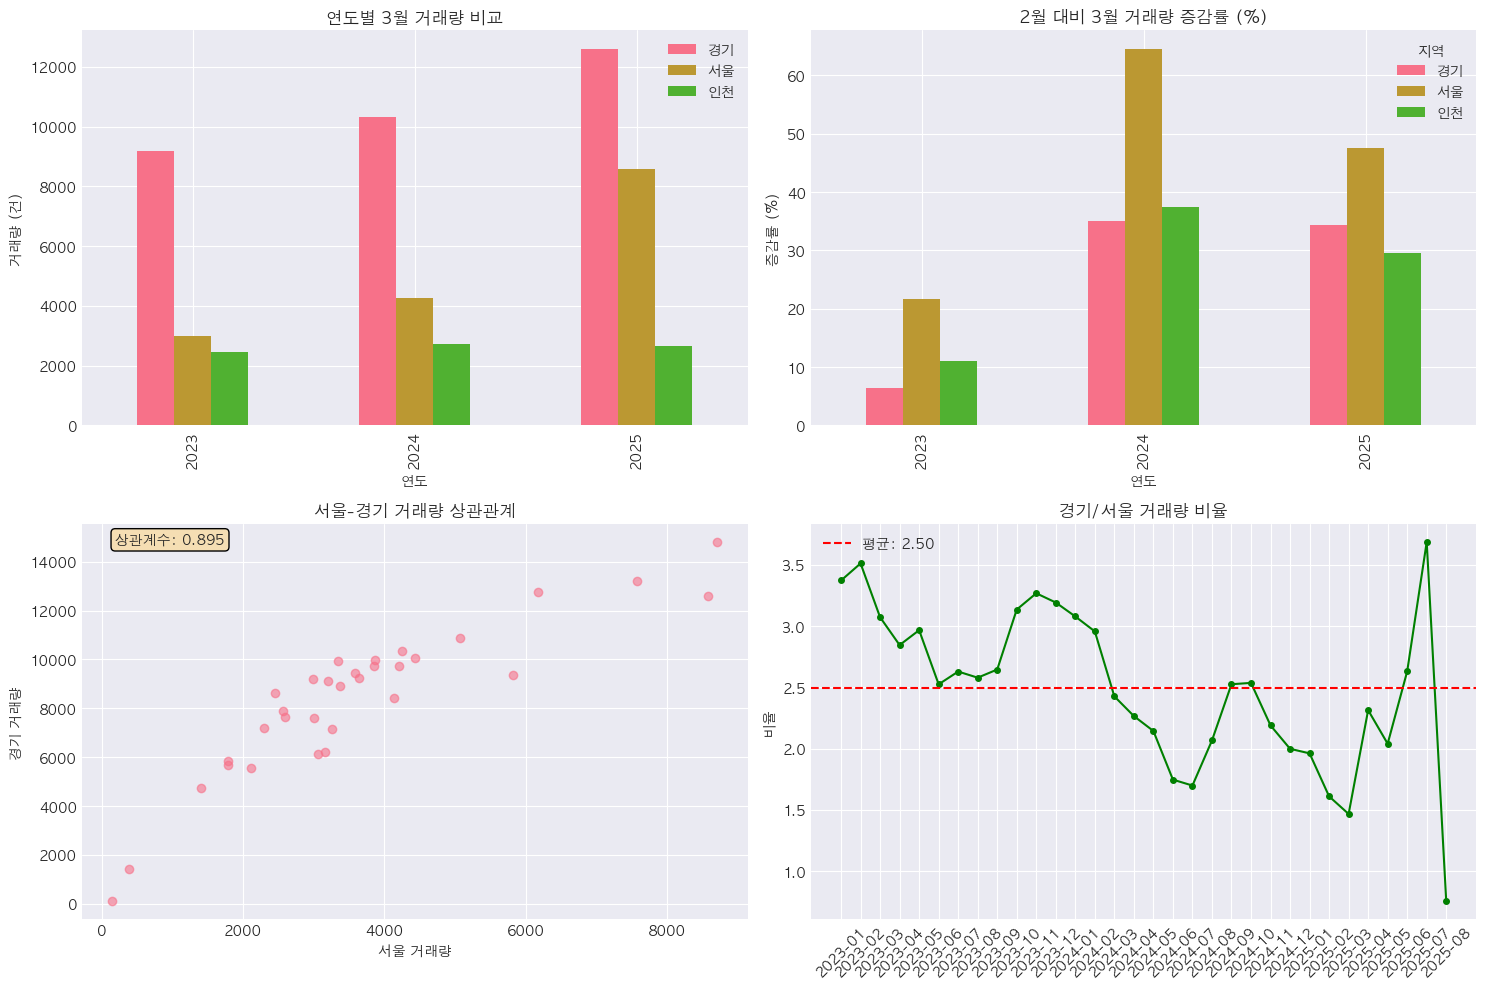


3월 거래 급증 연도: [2023, 2024, 2025]
경기도 상대 거래량이 높은 시기: ['2023-01', '2023-02', '2023-11', '2023-12', '2025-07']


In [13]:
# 5. 3월 특이점 및 연도별 패턴 분석
# 연도별 3월 거래량 변화
df_normal_sales['연도'] = df_normal_sales['계약날짜'].dt.year
march_data = df_normal_sales[df_normal_sales['계약날짜'].dt.month == 3]
march_yearly = march_data.groupby(['연도', '지역']).size().unstack(fill_value=0)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. 연도별 3월 거래량
ax1 = axes[0, 0]
march_yearly.plot(kind='bar', ax=ax1)
ax1.set_title('연도별 3월 거래량 비교')
ax1.set_ylabel('거래량 (건)')
ax1.legend()

# 2. 전월(2월) 대비 3월 증감률
feb_data = df_normal_sales[df_normal_sales['계약날짜'].dt.month == 2]
feb_yearly = feb_data.groupby(['연도', '지역']).size().unstack(fill_value=0)
march_growth = ((march_yearly - feb_yearly) / feb_yearly * 100).round(1)

ax2 = axes[0, 1]
march_growth.plot(kind='bar', ax=ax2)
ax2.set_title('2월 대비 3월 거래량 증감률 (%)')
ax2.set_ylabel('증감률 (%)')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# 3. 서울-경기 상관관계
ax3 = axes[1, 0]
ax3.scatter(monthly_volume['서울'], monthly_volume['경기'], alpha=0.6)
ax3.set_xlabel('서울 거래량')
ax3.set_ylabel('경기 거래량')
ax3.set_title('서울-경기 거래량 상관관계')

# 상관계수 계산
corr_seoul_gyeonggi = monthly_volume['서울'].corr(monthly_volume['경기'])
ax3.text(0.05, 0.95, f'상관계수: {corr_seoul_gyeonggi:.3f}', 
         transform=ax3.transAxes, bbox=dict(boxstyle='round', facecolor='wheat'))

# 4. 경기도 고유 패턴 (서울 대비 비율)
ax4 = axes[1, 1]
gyeonggi_seoul_ratio = monthly_volume['경기'] / monthly_volume['서울']
ax4.plot(monthly_volume.index.astype(str), gyeonggi_seoul_ratio, 
         marker='o', markersize=4, color='green')
ax4.set_title('경기/서울 거래량 비율')
ax4.set_ylabel('비율')
ax4.axhline(y=gyeonggi_seoul_ratio.mean(), color='red', linestyle='--', 
            label=f'평균: {gyeonggi_seoul_ratio.mean():.2f}')
ax4.legend()
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 특이점 변수 저장
march_anomaly_years = march_growth[march_growth > 50].index.tolist()
gyeonggi_unique_months = monthly_volume.index[gyeonggi_seoul_ratio > gyeonggi_seoul_ratio.mean() + gyeonggi_seoul_ratio.std()].tolist()

print(f"\n3월 거래 급증 연도: {march_anomaly_years}")
print(f"경기도 상대 거래량이 높은 시기: {[str(m) for m in gyeonggi_unique_months[:5]]}")

# Gemini의 중간 정리

정확한 지적이십니다. 제가 분석 결과를 잘못 해석하여 전달드렸습니다. 죄송합니다.

---

### 1. '변동성'과 '변동계수'의 의미

부동산 시장에서 '변동성'은 **시장이 얼마나 예측 불가능하게, 그리고 큰 폭으로 움직이는가**를 의미합니다. 이것을 측정하는 방법에는 여러 가지가 있습니다.

*   **표준편차 (Standard Deviation)**: 데이터가 평균에서 얼마나 떨어져 있는지를 나타내는 **절대적인 값**입니다.
    *   경기도의 표준편차: 2,174건
    *   서울의 표준편차: 1,114건
    *   이것만 보면 경기도의 변동 건수가 훨씬 많아 보입니다.

*   **변동계수 (Coefficient of Variation, CV)**: 하지만 두 시장은 평균 거래량(규모) 자체가 다릅니다. 경기도(평균 6,448건)는 서울(평균 3,148건)보다 시장이 2배 이상 큽니다. 규모가 다른 두 시장을 공정하게 비교하기 위해 **'평균 대비 변동폭이 얼마나 큰가'**를 보는 상대적인 지표가 바로 변동계수입니다.
    *   **계산식**: `변동계수 = 표준편차 / 평균`
    *   **의미**: 변동계수가 높다는 것은 **"평소 자기 시장 규모에 비해 거래량의 월별 등락이 매우 심하다"**는 뜻입니다. 즉, 시장의 체력 대비 롤러코스터를 더 심하게 타는 것입니다.

### 2. 올바른 데이터 해석 및 지역별 특성

제공된 데이터를 다시 정확하게 해석하면 다음과 같습니다.

| 지역 | 월평균 거래량 | 표준편차 | **변동계수 (CV)** | 해석 |
| :--- | :--- | :--- | :--- | :--- |
| **서울** | 3,148 | 1,114 | **0.354 (가장 높음)** | **평균 거래량 대비 월별 등락폭이 가장 극심함.** 시장 분위기에 따라 거래량이 급증하거나 급감하는 정도가 가장 큼. |
| **경기** | 6,448 | 2,174 | 0.337 (중간) | **절대적인 거래량과 변동 건수는 가장 크지만,** 전체 시장 규모 대비 변동의 '비율'은 서울보다 안정적임. |
| **인천** | 3,191 | 824 | **0.258 (가장 낮음)** | 세 지역 중 **가장 안정적인 거래량 흐름**을 보임. |

### 3. 수정된 경기도 부동산 투자 특성

이 올바른 해석을 바탕으로 경기도의 투자 특성을 다시 정리하겠습니다.

*   **리스크 요인 수정**: 경기도의 리스크는 '가장 높은 변동성'이 아니라, **'서울 시장에 대한 높은 의존성'**과 **'절대적인 변동 건수의 규모'**입니다. 즉, 시장이 하락할 때 경기도에서 줄어드는 거래 건수 자체는 다른 지역보다 훨씬 클 수 있습니다.
*   **기회 요인 강조**: 경기도의 가장 큰 투자 매력은 **'수도권 최대의 유동성'**과 서울보다 **'상대적으로 안정적인 시장 흐름'**입니다. 서울만큼 시장 분위기를 극단적으로 타지 않으면서도, 풍부한 거래량을 바탕으로 안정적인 투자가 가능할 수 있습니다.

**결론적으로, 지적해주신 덕분에 분석을 더 정확하게 할 수 있었습니다.**

*   **서울**: 가장 **민감하고 극적인 시장**. 투자 타이밍을 잘못 잡으면 리스크가 크지만, 상승기에는 폭발적인 거래량 증가를 기대할 수 있습니다.
*   **경기도**: **거대하고 안정적인 서울의 동반자 시장**. 서울의 흐름을 따라가지만 상대적으로는 덜 출렁이며, 풍부한 유동성이 가장 큰 장점입니다.
*   **인천**: **가장 예측 가능하고 안정적인 시장**. 급격한 변화보다는 꾸준한 흐름을 선호하는 안정 지향 투자자에게 더 적합할 수 있습니다.